In [1]:
import gzip
import pickle 
import mplhep as hep
hep.style.use("CMS")
import matplotlib
matplotlib.rc('font', size=15)
import numpy as np
import torch 
import dgl
import pandas as pd
import numpy as np
import plotly.express as px
import sys
sys.path.append("/afs/cern.ch/work/m/mgarciam/private/Tracking_wcoc/")
from sklearn.cluster import DBSCAN
#from torch_scatter import scatter_max, scatter_add, scatter_mean
# from src.layers.inference_oc import get_clustering, obtain_intersection_values
from scipy.optimize import linear_sum_assignment
import numpy as np
import matplotlib.pyplot as plt

/afs/cern.ch/work/m/mgarciam/private/miniconda/miniconda3/envs/graphgps0/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from src.utils.inference.pandas_helpers import open_mlpf_dataframe
list_all_df_hdb = []
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_0_all.pt"
sd_hgb1, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_0_2210_4000_6000.pt"
sd_hgb2, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_0_Zjj_6000_8000.pt"
sd_hgb3, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_0Zjj_8_2k8_25k_0311.pt"
sd_hgb4, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_0_Zjj_8_26k8_5k_0411.pt"
sd_hgb5, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_0_Zjj_251_300_0411.pt"
sd_hgb6, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_0_Zjj_8k_8_1k_411.pt"
sd_hgb7, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
sd_hgb = pd.concat([sd_hgb1,sd_hgb2, sd_hgb3,sd_hgb4, sd_hgb5, sd_hgb6, sd_hgb7])
# missing to add the 6000-8000

path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_1_all.pt"
sd_hgb_ct1, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_1_2210_4000_6000.pt"
sd_hgb_ct2, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_1_Zjj_6000_8000.pt"
sd_hgb_ct3, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_1Zjj_8_2k8_25k_0311.pt"
sd_hgb_ct4, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_1_Zjj_8_26k8_5k_0411.pt"
sd_hgb_ct5, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_1_Zjj_251_300_0411.pt"
sd_hgb_ct6, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_1_Zjj_8k_8_1k_411.pt"
sd_hgb_ct7, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
sd_hgb_ct = pd.concat([sd_hgb_ct1,sd_hgb_ct2,sd_hgb_ct3, sd_hgb_ct4, sd_hgb_ct5, sd_hgb_ct6, sd_hgb_ct7])

# this was the old IDEA without HDBSCAN
# path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_wcoc/models/180324_Zcard_v_full/showers_df_evaluation/0_0_0_2210_4000_6000.pt"
# sd_hgb0 = pd.read_pickle(path_hgcal)
# path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_wcoc/models/180324_Zcard_v_full/showers_df_evaluation/0_0_0_Zjj2410_5000_6000.pt"
# sd_hgb1 = pd.read_pickle(path_hgcal)
# sd_hgb_idea = pd.concat([sd_hgb0,sd_hgb1])
# allsd = sd_hgb_idea

path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_wcoc/models/180324_Zcard_v_full/showers_df_evaluation/0_0_0_Zjj_5000_6000_v1.pt"
sd_hgb0 = pd.read_pickle(path_hgcal)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_wcoc/models/180324_Zcard_v_full/showers_df_evaluation/0_0_00_0_0_Zjj_4000_5000_v1.pt"
sd_hgb1 = pd.read_pickle(path_hgcal)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_wcoc/models/180324_Zcard_v_full/showers_df_evaluation/0_0_0Zjj_83k84k_0311.pt"
sd_hgb2 = pd.read_pickle(path_hgcal)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_wcoc/models/180324_Zcard_v_full/showers_df_evaluation/0_0_0_Zjj_6k_7k_411.pt"
sd_hgb3 = pd.read_pickle(path_hgcal)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_wcoc/models/180324_Zcard_v_full/showers_df_evaluation/0_0_0Zjj_6k8k_0311.pt"
sd_hgb4 = pd.read_pickle(path_hgcal)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_wcoc/models/180324_Zcard_v_full/showers_df_evaluation/0_0_0_Zjj_8_4k_8_5k_511.pt"
sd_hgb5 = pd.read_pickle(path_hgcal)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_wcoc/models/180324_Zcard_v_full/showers_df_evaluation/0_0_0_Zjj_8_5k_8_6k_511.pt"
sd_hgb6 = pd.read_pickle(path_hgcal)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_wcoc/models/180324_Zcard_v_full/showers_df_evaluation/0_0_0_Zjj_8_6k_8_7k_511.pt"
sd_hgb7 = pd.read_pickle(path_hgcal)

path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_wcoc/models/180324_Zcard_v_full/showers_df_evaluation/0_0_0_Zjj_8_7k_8_8k_511.pt"
sd_hgb8 = pd.read_pickle(path_hgcal)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_wcoc/models/180324_Zcard_v_full/showers_df_evaluation/0_0_0_Zjj_8_8k_8_9k_511.pt"
sd_hgb9 = pd.read_pickle(path_hgcal)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_wcoc/models/180324_Zcard_v_full/showers_df_evaluation/0_0_0_Zjj_8_9k_9k_511.pt"
sd_hgb10 = pd.read_pickle(path_hgcal)
sd_hgb_idea = pd.concat([sd_hgb0,sd_hgb1, sd_hgb2, sd_hgb3, sd_hgb4, sd_hgb5, sd_hgb6, sd_hgb7, sd_hgb8, sd_hgb9,sd_hgb10])
allsd = sd_hgb_idea
# 

/afs/cern.ch/work/m/mgarciam/private/Tracking_wcoc/src/utils/inference/pandas_helpers.py:48: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  mask = (~np.isnan(sd["pred_showers_E"])) * (~np.isnan(sd["reco_showers_E"]))
/afs/cern.ch/work/m/mgarciam/private/Tracking_wcoc/src/utils/inference/pandas_helpers.py:48: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  mask = (~np.isnan(sd["pred_showers_E"])) * (~np.isnan(sd["reco_showers_E"]))
/afs/cern.ch/work/m/mgarciam/private/Tracking_wcoc/src/utils/inference/pandas_helpers.py:48: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  mask = (~np.isnan(sd["pred_showers_E"])) * (~np.isnan(sd["reco_showers_E"]))
/afs/cern.ch/work/m/mgarciam/private/Tracking_wcoc/src/utils/inference/pandas_helpers.py:48: U

In [3]:

mask_R = sd_hgb_ct["R"].values<0.05
mask_number_unique_hits =  sd_hgb_ct["number_unique_hits"].values>3
mask_theta_lower = sd_hgb_ct["theta"].values>(10/180*np.pi)
mask_theta_higher = sd_hgb_ct["theta"].values<(170/180*np.pi)
mask_delta_MC = sd_hgb_ct["delta_MC"].values>0.02
mask_delta_MC_1 = sd_hgb_ct["delta_MC"].values>0
mask_pt = sd_hgb_ct["true_showers_pt"].values>1
mask_gen_status = sd_hgb_ct["gen_status"]==1
total_mask_ct = mask_R*mask_theta_lower*mask_theta_higher*mask_delta_MC*mask_gen_status*mask_number_unique_hits
mask_delta_plot = mask_R*mask_theta_lower*mask_theta_higher*mask_pt*mask_gen_status*mask_number_unique_hits*mask_delta_MC_1
#mask_delta_plot = mask_pt*mask_gen_status*mask_number_unique_hits*mask_delta_MC_1
mask_no_R = mask_theta_lower*mask_theta_higher*mask_delta_MC*mask_pt*mask_gen_status*mask_number_unique_hits
total_mask_ct_all_partices = mask_R*mask_theta_lower*mask_theta_higher*mask_delta_MC*mask_number_unique_hits
print(len(sd_hgb_ct), len( sd_hgb_ct[total_mask_ct]))
reconstructable_ct = sd_hgb_ct[total_mask_ct]
reco_R_ct  = sd_hgb_ct[mask_no_R]
reco_delta_plot = sd_hgb_ct[mask_delta_plot]
reconstructable_ct_all_p = sd_hgb_ct[total_mask_ct_all_partices]
##################################################################################################
####  ML CLD
##################################################################################################
mask_R = sd_hgb["R"].values<0.05
mask_number_unique_hits =  sd_hgb["number_unique_hits"].values>3
mask_theta_lower = sd_hgb["theta"].values>(10/180*np.pi)
mask_theta_higher = sd_hgb["theta"].values<(170/180*np.pi)
mask_delta_MC = sd_hgb["delta_MC"].values>0.02
mask_delta_MC_1 = sd_hgb["delta_MC"].values>0
mask_pt = sd_hgb["true_showers_pt"].values>1
mask_gen_status = sd_hgb["gen_status"]==1
total_mask = mask_R*mask_theta_lower*mask_theta_higher*mask_delta_MC*mask_gen_status*mask_number_unique_hits
mask_delta_plot = mask_R*mask_theta_lower*mask_theta_higher*mask_pt*mask_gen_status*mask_number_unique_hits*mask_delta_MC_1
mask_no_R = mask_theta_lower*mask_theta_higher*mask_delta_MC*mask_pt*mask_gen_status*mask_number_unique_hits
total_mask_all_particles = mask_R*mask_theta_lower*mask_theta_higher*mask_delta_MC*mask_number_unique_hits
print(len(sd_hgb), len(sd_hgb[total_mask]))
reconstructable_ml = sd_hgb[total_mask]
reconstructable_ml_all_p = sd_hgb[total_mask_all_particles]
reco_R_ml   = sd_hgb[mask_no_R]
reco_delta_plot_ml = sd_hgb[mask_delta_plot]




/tmp/mgarciam/ipykernel_1638577/182089605.py:9: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  total_mask_ct = mask_R*mask_theta_lower*mask_theta_higher*mask_delta_MC*mask_gen_status*mask_number_unique_hits
/tmp/mgarciam/ipykernel_1638577/182089605.py:10: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  mask_delta_plot = mask_R*mask_theta_lower*mask_theta_higher*mask_pt*mask_gen_status*mask_number_unique_hits*mask_delta_MC_1
/tmp/mgarciam/ipykernel_1638577/182089605.py:12: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  mask_no_R = mask_theta_lower*mask_theta_higher*mask_delta_MC*mask_pt*mask_gen_status*mask_number_unique_hits


16557176 9591815


/tmp/mgarciam/ipykernel_1638577/182089605.py:30: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  total_mask = mask_R*mask_theta_lower*mask_theta_higher*mask_delta_MC*mask_gen_status*mask_number_unique_hits
/tmp/mgarciam/ipykernel_1638577/182089605.py:31: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  mask_delta_plot = mask_R*mask_theta_lower*mask_theta_higher*mask_pt*mask_gen_status*mask_number_unique_hits*mask_delta_MC_1
/tmp/mgarciam/ipykernel_1638577/182089605.py:32: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  mask_no_R = mask_theta_lower*mask_theta_higher*mask_delta_MC*mask_pt*mask_gen_status*mask_number_unique_hits


16783660 9591497


In [20]:

## CUTS
log = True
mask_delta = allsd.delta_MC>0.02
mask_delta_1 = allsd.delta_MC>0

mask_reco = allsd.reco_showers_E>15
mask_dc_hits = allsd.cdc_hits>2
mask_pt = allsd.true_showers_pt>1
mask_gen_status = allsd.gen_status==1
sd_hgb_ = allsd[mask_reco*mask_delta*mask_dc_hits*mask_gen_status]
sd_hgb_mc = allsd[mask_reco*mask_dc_hits*mask_pt*mask_gen_status*mask_delta_1]
print(len(allsd), len(sd_hgb_))
all_particles_dc = create_eff_dic(sd_hgb_,sd_hgb_,sd_hgb_mc)




/tmp/mgarciam/ipykernel_1638577/215354934.py:10: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  sd_hgb_ = allsd[mask_reco*mask_delta*mask_dc_hits*mask_gen_status]
/tmp/mgarciam/ipykernel_1638577/215354934.py:11: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  sd_hgb_mc = allsd[mask_reco*mask_dc_hits*mask_pt*mask_gen_status*mask_delta_1]


21395599 14884385
0.0010000000000000002 0.0020137527074704773 2856 2920
0.0020137527074704773 0.004055199966844677 6010 6208
0.004055199966844677 0.008166169912567656 16703 17413
0.008166169912567656 0.016444646771097065 59073 61380
0.016444646771097065 0.03311545195869235 220972 226839
0.03311545195869235 0.06668633104092522 732460 744980
0.06668633104092522 0.13428977968493566 1632990 1648660
0.13428977968493566 0.27042640742615304 2011187 2021632
0.27042640742615304 0.54457191012593 1328278 1334121
0.54457191012593 1.0966331584284608 438698 440511


In [21]:
eff_dict_ct = create_eff_dic(reconstructable_ct,reco_R_ct,reco_delta_plot)
# eff_dict_ct_all_p = create_eff_dic(reconstructable_ct_all_p,reco_R_ct,reco_delta_plot)

0.0010000000000000002 0.0020137527074704773 2667 2878
0.0020137527074704773 0.004055199966844677 6252 6743
0.004055199966844677 0.008166169912567656 20168 21632
0.008166169912567656 0.016444646771097065 74558 79771
0.016444646771097065 0.03311545195869235 274353 287031
0.03311545195869235 0.06668633104092522 819720 838219
0.06668633104092522 0.13428977968493566 1436156 1455608
0.13428977968493566 0.27042640742615304 1334989 1351583
0.27042640742615304 0.54457191012593 639967 648699
0.54457191012593 1.0966331584284608 136295 138460


In [22]:
eff_dict_ml = create_eff_dic(reconstructable_ml,reco_R_ml,reco_delta_plot_ml)
# eff_dict_ml_all_p = create_eff_dic(reconstructable_ml_all_p,reco_R_ml,reco_delta_plot_ml)

0.0010000000000000002 0.0020137527074704773 2801 2876
0.0020137527074704773 0.004055199966844677 6517 6743
0.004055199966844677 0.008166169912567656 21009 21629
0.008166169912567656 0.016444646771097065 78121 79759
0.016444646771097065 0.03311545195869235 283606 287007
0.03311545195869235 0.06668633104092522 832098 838173
0.06668633104092522 0.13428977968493566 1447802 1455535
0.13428977968493566 0.27042640742615304 1345578 1351537
0.27042640742615304 0.54457191012593 646579 648680
0.54457191012593 1.0966331584284608 138175 138455


In [13]:
def limit_error_bars(y, yerr, upper_limit=1):
    yerr_upper = np.minimum(y + yerr, upper_limit) - y
    yerr_lower = yerr  # Lower error bars remain unchanged
    return yerr_lower, yerr_upper


In [35]:
all_particles_dc["errors_delta_mc"][0]

0.025740585229664378

In [16]:
eff_dict_ml["errors_delta_mc"][0]

0.02585429375674018

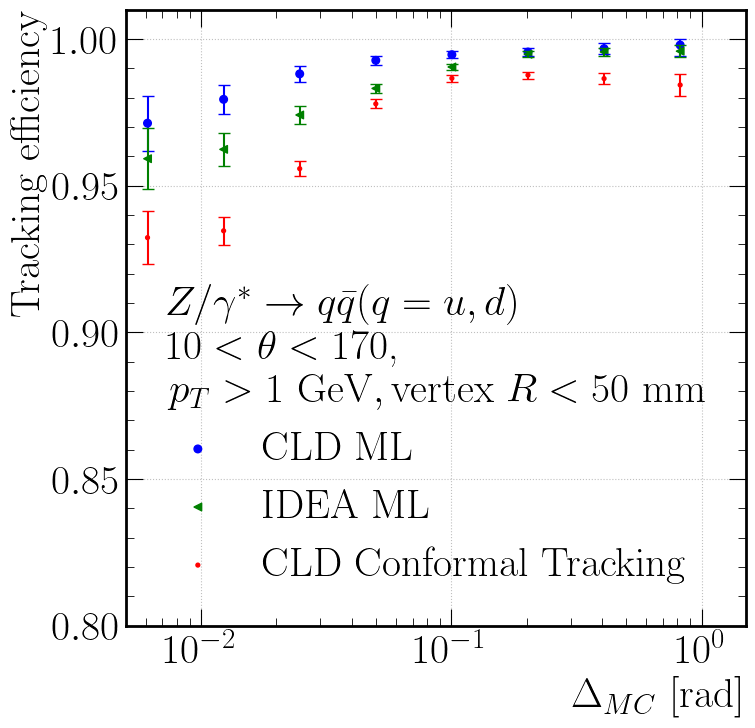

In [16]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
fig= plt.figure( figsize=(8,8))
ax = fig.add_subplot(111)
colors_list = ["#FF0000", "#FF0000", "#0000FF"]
index = 0
j = 0
colors = [ "b", "g","r"]
marker = [ "o", "<", '.']
# labels = ["CLD Conformal Tracking", "GCLD GTF", "IDEA GGTF"]
# dataframe_list = [eff_dict_ct, eff_dict_ml, all_particles_dc]
labels = [ "CLD ML", "IDEA ML","CLD Conformal Tracking"]
dataframe_list = [eff_dict_ml, all_particles_dc, eff_dict_ct]
i =0 
log = True
plt.xlabel(r"$\Delta_{MC}$ [rad]")
plt.ylabel("Tracking efficiency")

for i in range(0, len(dataframe_list)):
    plt.scatter(
        np.array(dataframe_list[i]["delta_MC_values"]),
        np.array(dataframe_list[i]["eff_delta_MC"]),
        label=labels[i] ,
        marker=marker[i],
        c = [colors[i] for j in range(0,len(dataframe_list[i]["eff_delta_MC"]))],
        s=30,
    )
    error_y = dataframe_list[i]["errors_delta_mc"]
    yerr_lower, yerr_upper = limit_error_bars(np.array(dataframe_list[i]["eff_delta_MC"]), np.array(error_y), upper_limit=1)
    plt.errorbar(dataframe_list[i]["delta_MC_values"], dataframe_list[i]["eff_delta_MC"] ,yerr= [yerr_lower, yerr_upper], ecolor=colors[i], linestyle='none', capsize=4)


# plt.title("CLD")
plt.legend(loc="lower right",title=r'$Z/\gamma^* \rightarrow q \bar q (q=u,d)$' "\n" r'$10< \theta< 170$,' "\n" r"$p_T>1 \textrm{ GeV}, \textrm{vertex } R<50 \textrm{ mm}$")
plt.xscale("log")
# ax.xaxis.set_major_locator(plt.LogLocator(base=10.0, numticks=4))
# ax.xaxis.set_minor_locator(plt.LogLocator(base=10.0, subs='auto', numticks=10))
# ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
# ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
# ax.grid(which='major', linestyle=':', linewidth='0.5', color='black')
# ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.grid(True)
plt.rc("text", usetex=True)
plt.rc("font", family="serif")
plt.xlim([5*1e-3,1.5])
plt.ylim([0.8,1.01])
size_font=30
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = size_font
plt.rcParams['axes.labelsize'] = size_font
plt.rcParams['xtick.labelsize'] = size_font
plt.rcParams['ytick.labelsize'] = size_font
plt.rcParams['legend.fontsize'] = 30
leg = ax.get_legend()
leg._legend_box.align = "left"
import os 
PATH_store = "/afs/cern.ch/work/m/mgarciam/private/Tracking_wcoc/notebook/"
fig.savefig(
            os.path.join(PATH_store, "Tracking_efficiency_comparison_IDEA_CLD_Zjj.pdf"),
            bbox_inches="tight",
        )

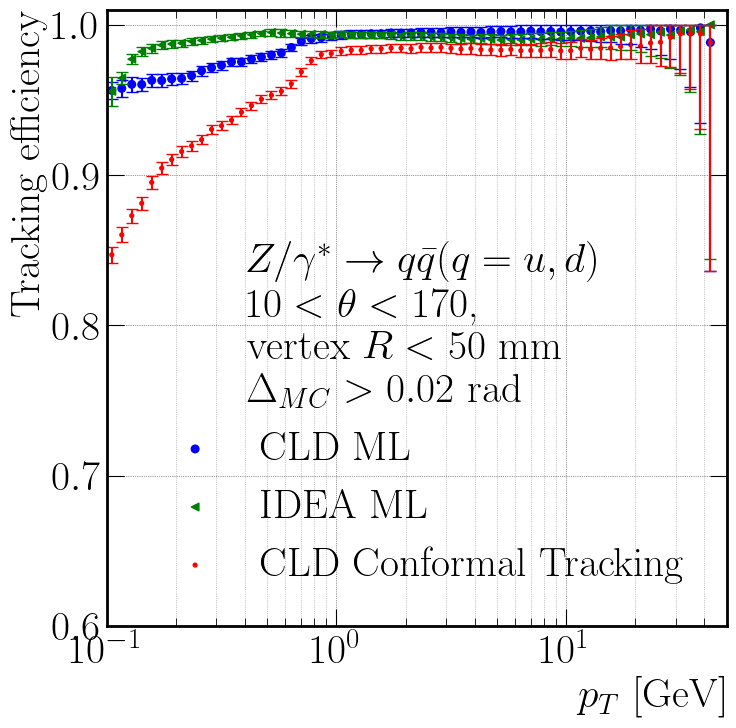

In [23]:
def limit_error_bars(y, yerr, upper_limit=1):
    yerr_upper = np.minimum(y + yerr, upper_limit) - y
    yerr_lower = yerr  # Lower error bars remain unchanged
    return yerr_lower, yerr_upper
fig= plt.figure( figsize=(8,8))
axs = fig.add_subplot(111)
colors_list = ["#FF0000", "#FF0000", "#0000FF"]
index = 0
j = 0
colors = [ "b", "g","r"]
marker = [ "o", "<", '.']
labels = [ "CLD ML", "IDEA ML","CLD Conformal Tracking"]
dataframe_list = [eff_dict_ml, all_particles_dc, eff_dict_ct]
i =0 
plot_title =""
log = True
plt.xlabel("$p_T$ [GeV]")
plt.ylabel("Tracking efficiency")

for i in range(0, len(dataframe_list)):
    axs.scatter(
        dataframe_list[i]["energy_eff"],
        dataframe_list[i]["eff"],
        label=labels[i] ,
        marker=marker[i],
        c = [colors[i] for j in range(0,len(dataframe_list[i]["eff"]))],
        s=30,
    )
    error_y = dataframe_list[i]["errors"]
    yerr_lower, yerr_upper = limit_error_bars(np.array(dataframe_list[i]["eff"]), np.array(error_y), upper_limit=1)
    plt.errorbar(dataframe_list[i]["energy_eff"], dataframe_list[i]["eff"] ,yerr= [yerr_lower, yerr_upper], ecolor=colors[i], linestyle='none', capsize=4)

    # axs.errorbar(dataframe_list[i]["energy_eff"], dataframe_list[i]["eff"] , xerr=dataframe_list[i]["size_energy_bin"]/2,yerr= dataframe_list[i]["errors"], linestyle='none')

if log:
    log_ = "log"
    axs.set_xscale("log")
else:
    log_ = ""
axs.set_ylim([0.7, 1.01])
# axs.legend(loc="lower left")

# axs.axvline(x=0.7, linestyle='--')
plt.legend(loc="lower right",title=r'$Z/\gamma^* \rightarrow q \bar q (q=u,d)$' "\n" r'$10< \theta< 170$,' "\n" r"$\textrm{vertex } R<50 \textrm{ mm}$" "\n" r"$\Delta_{MC}>0.02 \textrm{ rad}$")


axs.xaxis.set_major_locator(plt.LogLocator(base=10.0, numticks=4))
axs.xaxis.set_minor_locator(plt.LogLocator(base=10.0, subs='auto', numticks=10))
axs.yaxis.set_major_locator(plt.MultipleLocator(0.1))
axs.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
axs.grid(which='major', linestyle=':', linewidth='0.5', color='black')
axs.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.xlim([1e-1,50])
plt.ylim([0.6,1.01])
plt.rc("text", usetex=True)
plt.rc("font", family="serif")
size_font = 30
plt.rcParams['font.size'] = size_font
plt.rcParams['axes.labelsize'] = size_font
plt.rcParams['xtick.labelsize'] = size_font
plt.rcParams['ytick.labelsize'] = size_font
plt.rcParams['legend.fontsize'] = 30
fig.savefig(
            os.path.join(PATH_store, "Tracking_efficiency_vs_pt_comparison_IDEA_CLD_Zjj.pdf"),
            bbox_inches="tight",
        )
# leg._legend_box.align = "right"

In [19]:

def create_eff_dic(matched_, reco_r,reco_delta):
    df_id = matched_
    photons_dic = calculate_eff(df_id)
    photons_dic = calculate_eff_vertex(reco_r,photons_dic)
    photons_dic = calculate_eff_DeltaMC(reco_delta,photons_dic)
    return photons_dic


def calculate_eff(sd, log_scale=False):
    # if log_scale:
    bins = np.exp(np.arange(np.log(1e-1), np.log(50), 0.1))
    # else:
    #     bins = np.arange(0, 51, 2)
    #bins = [5e-3,0.1,1.80804241e-01,2.98095799e-01, 4.91476884e-01, 8.10308393e-01, 1.33597268e+00,2.20264658e+00, 3.63155027e+00, 5.98741417e+00, 9.87157710e+00,1.62754791e+01, 2.68337287e+01, 4.42413392e+01]
    bins = np.array(bins)
    eff = []
    eff_50 = []
    eff_75 = []
    energy_eff = []
    size_energy_bin = []
    errors = []
    number_of_hits = []
    number_of_hits_var = []
    total_showers_ = []
    purity = []
    purity_var = []
    number_of_hits_unique = []
    number_of_hits_var_unique = []
    for i in range(len(bins) - 1):
        bin_i = bins[i]
        bin_i1 = bins[i + 1]
        mask_above = sd.true_showers_pt.values <= bin_i1
        mask_below = sd.true_showers_pt.values > bin_i
        # this mask takes all E that have values (does not include fakes then)
        mask = mask_below * mask_above
        number_of_non_reconstructed_showers = np.sum(
            np.isnan(sd.pred_showers_E.values)[mask]
        )
        mask_non_nan = ~np.isnan(sd.e_pred_and_truth.values)
        total_showers = len(sd.pred_showers_E.values[mask])
        if total_showers > 0:
            #total_reconstructed_cld_crit = np.sum(sd["e_pred_and_truth"][mask].values>3)
            particle_purity = sd["e_pred_and_truth"][mask].values/sd["reco_showers_E"][mask].values
            track_purity = sd["e_pred_and_truth"][mask].values/sd["pred_showers_E"][mask].values
            more_than_4_hits = sd["pred_showers_E"][mask].values>3
            total_reconstructed_cld_crit = np.sum((sd["e_pred_and_truth"][mask].values>3)*more_than_4_hits)
            # total_reconstructed_cld_crit =  np.sum((track_purity>=0.75)*more_than_4_hits)
            #total_reconstructed_cld_crit =  np.sum((particle_purity>=0.4)*(track_purity>=0.4)*more_than_4_hits)
      

            # print(total_reconstructed_cld_crit,total_showers )
            percentage_of_hits_MC = sd["e_pred_and_truth"][mask*mask_non_nan].values/sd["reco_showers_E"][mask*mask_non_nan].values
            percentage_of_hits_MC_unique = sd["number_unique_hits_reconstructed"][mask*mask_non_nan].values/sd["number_unique_hits"][mask*mask_non_nan].values
            purity_list =  sd["e_pred_and_truth"][mask*mask_non_nan].values/sd["pred_showers_E"][mask*mask_non_nan].values
            n_t_purity =  sd["e_pred_and_truth"][mask*mask_non_nan].values
            n_f = sd["pred_showers_E"][mask*mask_non_nan].values-n_t_purity
            sigma_t_purity = np.var(n_t_purity)
            sigma_f_purity = np.var(n_f)
            error_purity = (n_f/(n_t_purity+n_f)**2*sigma_t_purity)**2+(n_t_purity*sigma_f_purity/(n_t_purity+n_f)**2)**2
            N = len(error_purity)
            purity.append(np.mean(purity_list))
            purity_var.append(1/N*(np.sqrt(np.sum(error_purity))))
            number_of_hits.append(np.mean(percentage_of_hits_MC))
            number_of_hits_unique.append(np.mean(percentage_of_hits_MC_unique))

            n_r = sd["e_pred_and_truth"][mask*mask_non_nan].values
            n_t = sd["reco_showers_E"][mask*mask_non_nan].values
            error_percentage_of_hits = (n_r/(n_t**2)*np.sqrt(n_t))**2+(1/n_t*np.sqrt(n_r))**2
            N = len(error_percentage_of_hits)
            number_of_hits_var.append(1/N*np.sqrt(np.sum(error_percentage_of_hits)))

            n_r = sd["number_unique_hits_reconstructed"][mask*mask_non_nan].values
            n_t = sd["number_unique_hits"][mask*mask_non_nan].values
            N = len(error_percentage_of_hits)
            error_percentage_of_hits_unique = (n_r/(n_t**2)*np.sqrt(n_t))**2+(1/n_t*np.sqrt(n_r))**2
            number_of_hits_var_unique.append(1/N*np.sqrt(np.sum(error_percentage_of_hits_unique)))
            total_reconstructed_50 = np.sum(percentage_of_hits_MC>0.50)
            total_reconstructed_75 = np.sum(percentage_of_hits_MC>0.75)
            eff.append(
                (total_reconstructed_cld_crit) / total_showers
            )
            eff_50.append(total_reconstructed_50/total_showers)
            eff_75.append(total_reconstructed_75/total_showers)
            energy_eff.append((bin_i1 + bin_i) / 2)
            size_energy_bin.append((bin_i1-bin_i)/2)
            total_showers_.append(total_showers)
            n_total = total_showers
            n_r = total_reconstructed_cld_crit
            error = (n_r/(n_total**2)*np.sqrt(n_total))**2+(1/n_total*np.sqrt(n_r))**2
            error = np.sqrt(error)
            errors.append(error)
        # print(
        #     "bin",
        #     bin_i1,
        #     bin_i,
        #     (total_showers - number_of_non_reconstructed_showers) / total_showers,
        #     total_showers,
        #     (total_showers - number_of_non_reconstructed_showers),
        #     error
        # )
    photons_dic = {}
    photons_dic["purity"]= purity
    photons_dic["number_of_hits_unique"]= number_of_hits_unique
    photons_dic["purity_var"]=purity_var
    # photons_dic["eff_50"] = eff_50
    # photons_dic["eff_75"] = eff_75
    photons_dic["eff"] = eff
    photons_dic["number_of_hits"]=number_of_hits
    photons_dic["number_of_hits_var"]= number_of_hits_var
    photons_dic["number_of_hits_var_unique"] = number_of_hits_var_unique
    photons_dic["energy_eff"] = energy_eff
    photons_dic["total_showers_"] = total_showers_
    photons_dic["size_energy_bin"] = size_energy_bin
    photons_dic["errors"] = errors
    return photons_dic


In [5]:
np.arccos(0.99)/np.pi*180

8.109614455994183

In [5]:
def calculate_eff_vertex(sd,photons_dic):
    # if log_scale:
   
    # else:
    bins = np.arange(0, 1000, 20)
    bins = np.array(bins)
    eff_v = []
    energy_v = []
    errors_v = []
    for i in range(len(bins) - 1):
        bin_i = bins[i]
        bin_i1 = bins[i + 1]
        mask_above = (sd.R.values*1000) <= bin_i1
        mask_below = (sd.R.values*1000) > bin_i
        mask = mask_below * mask_above

        total_showers = len(sd.pred_showers_E.values[mask])
        if total_showers > 0:
            # purity_calc = sd["e_pred_and_truth"][mask].values/sd["pred_showers_E"][mask].values
            # more_than_4_hits = sd["pred_showers_E"][mask].values>3
            # total_reconstructed_cld_crit =  np.sum((purity_calc>=0.75)*more_than_4_hits)
            total_reconstructed_cld_crit = np.sum(sd["e_pred_and_truth"][mask].values>3)
            # particle_purity = sd["e_pred_and_truth"][mask].values/sd["reco_showers_E"][mask].values
            # track_purity = sd["e_pred_and_truth"][mask].values/sd["pred_showers_E"][mask].values
            # more_than_4_hits = sd["pred_showers_E"][mask].values>3
            #total_reconstructed_cld_crit =  np.sum((purity_calc>=0.75)*more_than_4_hits)
            # total_reconstructed_cld_crit =  np.sum((particle_purity>=0.5)*(track_purity>=0.5)*more_than_4_hits)
            eff_v.append(
                (total_reconstructed_cld_crit) / total_showers
            )
            energy_v.append((bin_i1 + bin_i) / 2)
        
            n_total = total_showers
            n_r = total_reconstructed_cld_crit
            error = (n_r/(n_total**2)*np.sqrt(n_total))**2+(1/n_total*np.sqrt(n_r))**2
            error = np.sqrt(error)
            errors_v.append(error)

    photons_dic["eff_v"]= eff_v
    photons_dic["energy_v"]=energy_v
    photons_dic["errors_v"] =errors_v

    return photons_dic


In [7]:
 np.exp(np.arange(np.log(1e-3), np.log(0.5), 0.5))

array([0.001     , 0.00164872, 0.00271828, 0.00448169, 0.00738906,
       0.01218249, 0.02008554, 0.03311545, 0.05459815, 0.09001713,
       0.14841316, 0.24469193, 0.40342879])

In [6]:

def calculate_eff_DeltaMC(sd, photons, dictlog_scale=False):
    bins = np.exp(np.arange(np.log(1e-3), np.log(1.5), 0.7))
    eff = []
    energy_eff = []
    total_showers_ = []
    errors_delta_mc = []
    for i in range(len(bins) - 1):
        bin_i = bins[i]
        bin_i1 = bins[i + 1]
        mask_above = sd.delta_MC.values <= bin_i1
        mask_below = sd.delta_MC.values > bin_i
        mask = mask_below * mask_above
        number_of_non_reconstructed_showers = np.sum(
            np.isnan(sd.pred_showers_E.values)[mask]
        )
        total_showers = len(sd.pred_showers_E.values[mask])
        if total_showers > 0:
            # purity_calc = sd["e_pred_and_truth"][mask].values/sd["pred_showers_E"][mask].values
            # more_than_4_hits = sd["pred_showers_E"][mask].values>3
            # total_reconstructed_cld_crit =  np.sum((purity_calc>=0.75)*more_than_4_hits)
            total_reconstructed_cld_crit = np.sum(sd["e_pred_and_truth"][mask].values>3)
            # particle_purity = sd["e_pred_and_truth"][mask].values/sd["reco_showers_E"][mask].values
            # track_purity = sd["e_pred_and_truth"][mask].values/sd["pred_showers_E"][mask].values
            # more_than_4_hits = sd["pred_showers_E"][mask].values>3
            # total_reconstructed_cld_crit =  np.sum((particle_purity>=0.5)*(track_purity>=0.5)*more_than_4_hits)
            print(bin_i, bin_i1, total_reconstructed_cld_crit, total_showers)
            eff.append(
                (total_reconstructed_cld_crit) / total_showers
            )
            energy_eff.append((bin_i1 + bin_i) / 2)
            total_showers_.append(total_showers)
            n_total = total_showers
            n_r = total_reconstructed_cld_crit
            error = (n_r/(n_total**2)*np.sqrt(n_total))**2+(1/n_total*np.sqrt(n_r))**2
            error = np.sqrt(error)
            errors_delta_mc.append(error)
    photons["eff_delta_MC"]= eff
    photons["delta_MC_values"]=energy_eff
    photons["errors_delta_mc"]=errors_delta_mc
    return photons

In [9]:
np.exp(np.arange(np.log(1e-3), np.log(1.5), 0.7))

array([1.00000000e-03, 2.01375271e-03, 4.05519997e-03, 8.16616991e-03,
       1.64446468e-02, 3.31154520e-02, 6.66863310e-02, 1.34289780e-01,
       2.70426407e-01, 5.44571910e-01, 1.09663316e+00])

In [10]:
np.exp(np.arange(np.log(1e-3), np.log(1.5), 0.5))

array([1.00000000e-03, 1.64872127e-03, 2.71828183e-03, 4.48168907e-03,
       7.38905610e-03, 1.21824940e-02, 2.00855369e-02, 3.31154520e-02,
       5.45981500e-02, 9.00171313e-02, 1.48413159e-01, 2.44691932e-01,
       4.03428793e-01, 6.65141633e-01, 1.09663316e+00])